<center><h1>Data Preprocessing - Data Analysis</h1></center>

### Data Preprocessing

It is used for maintaining the **Quality** of the data. It includes important factors like - 

* Selecting the valid data variables
* Data editing is important in some aspects
* Maintaining uniformity in data values
* Manipulation of the data for achieving the above factors (Data Wrangling)

<img src="https://miro.medium.com/max/1400/1*FXy7iopWSzMTJX1LoAlr5A.png">

<br>

**Credits** - Image from Internet

<center><h1>Classroom Management</h1></center>

Imagine you are the new teacher freshly appointed to manage the classroom.

You want to know how many students are good in - 

    1. sports
    2. academics
    3. creative work
    4. marketing

Based on the students data, you have to conclude **who** can do well in **what**.

### Dataset description

You are given the **data of the students** that included the following variables - 

* Age
* Gender
* Address
* Father's occupation
* Mother's occupation
* Place of birth
* Height - ft
* Weight - kg
* Prev sports performance
* Prev academics performance
* Voluntary experience
* Extra co-curricular activities
* Arts and Design

**Note** - For our conveneince all the data values are numericals.

How do we convert a **" feeling "** into a number?

* We can measure a **" feeling "** into a number through a **" scale range "**
* If the scale is **1** to **4**, then we can term - 
    - 1 → Not Satisfied
    - 2 → Slightly Satisfied
    - 3 → Satisfied
    - 4 → Highly Satisfied

# Sports

### Scenario 1

Considering the variables that are direclty related - 

* Height
* Weight
* Prev sports performance

Based on this, you can only get the information of a student irrespective of **gender**.

### Scenario 2

Considering the other important factors like **gender** in order to categorize as per **Male related sports** and **Female related sports**.

* Gender
* Height
* Weight
* Prev sports performance

1. Based on this, you can categorize the performance of students in sports by **Male** and **Female**.
2. Visually, you can represent it by drawing pie chart.

<img src="http://4.bp.blogspot.com/_cJl9tX6twx0/TJ-yejG4soI/AAAAAAAAAPg/ugTGsLz6Lwo/s1600/pie+chart+men+and+women+media..png">

<br>

**Credits** - Image from Internet

### Scenario 3

If you want to do further research on how good the person is performing in other areas, you can do so by considering - 

* Gender
* Height
* Weight
* Prev sports performance
* Voluntary experience
* Extra co-curricular activities
* Prev academics performace (may be or may not be)

1. With this, you conclude the overall students performance on sports
2. Since you are a kind teacher and well wisher of student, you can give the student a proper career guidance.

# Academics

### Scenario 1

Considering the variables that are directly related - 

* Prev academics peroformance

Based on this, you can only get the information of student irrespective of **gender**.

### Scenario 2

Considering the other important factors like **gender** to categorize **Male** and **Female** separately.

* Gender
* Prev academics performance

1. Based on this, you can categorize the performance of students in academics by **Male** and **Female**.
2. Visually, you can represent it by drawing pie chart.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fak2.picdn.net%2Fshutterstock%2Fvideos%2F9595112%2Fthumb%2F11.jpg%3Fip%3Dx480&f=1&nofb=1">

<br>

**Credits** - Image from Internet

### Scenario 3

If you want to further research on why a particular student is **lagging behind** or **excelling ahead**, you can do so by considering - 

* Address
* Father's occupation
* Mother's occupation
* Prev academics performance
* Gender (for categorizing in terms of gender)

and later on, you can decide whether to change your teaching methodology or not.

**Note** - 

* Data Analyst should be wise enough to select the important data variables.
* This helps to get proper insights pertaining to the problem statement that he/she is assigned to do.

# Let's make our hands dirty

data source → http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('students_hw.csv')
df.head()

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


### Check the length of the `df`

In [3]:
df.shape

(200, 2)

# Data Preprocessing

### Check for `NaN`

In [4]:
df.isnull().any()

Height(Inches)    True
Weight(Pounds)    True
dtype: bool

In [5]:
df.columns

Index(['Height(Inches)', 'Weight(Pounds)'], dtype='object')

In [6]:
d = ['d', 't', 'g']
for i, j in enumerate(d):
    print(i, j)

0 d
1 t
2 g


In [7]:
def check_for_nan(dframe):
    """
    dframe → pandas data frame object
    returns `nan_places` a dictionary of column names and the `nan_indices`
    """
    nan_frame = dframe.isnull()
    d_cols = dframe.columns

    nan_places = {}
    for col in d_cols:
        col_lvals = nan_frame[col].to_list()
        nan_indices = [index for index, val in enumerate(col_lvals) if val == True]
        if nan_indices:
            nan_places[col] = nan_indices
        else:
            nan_places[col] = None

    return nan_places

In [8]:
check_for_nan(dframe=df)

{'Height(Inches)': [10, 32], 'Weight(Pounds)': [19]}

* In the column `Height(Inches)`, there are two `NaN` values at indices `10` and `32`.
* In the column `Weight(Pounds)`, there is one `NaN` value at index `19`.

**What can we do for those?**
- Remove the entire row which ever column has a `NaN`.

For this, we will remove the rows which ever column has `NaN`. In total, there are 3 rows that need to be removed.

### Remove 3 rows

* axis (0) → row
* axis (1) → column

In [9]:
pdf = df.dropna(axis=0)

### check the length of `pdf`

In [10]:
pdf.shape

(197, 2)

Since the index of the data frame is not in order, we need to reindex the index values to get the perfect order.

In [11]:
pdf.head(12)

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
5,68.70,123.30
6,69.80,141.49
7,70.01,136.46
8,67.90,112.37
9,66.78,120.67


### Reset the index

In [12]:
rdf = pdf.reset_index(drop=True)

In [13]:
rdf.shape

(197, 2)

In [14]:
rdf.head(12)

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
5,68.70,123.30
6,69.80,141.49
7,70.01,136.46
8,67.90,112.37
9,66.78,120.67


### Check if `Height(Inches)` < 40

In [15]:
inch_thresh = 40

In [16]:
d = rdf['Height(Inches)'] < inch_thresh
f = d.to_list()[93 : 98]
f

[True, False, False, False, False]

In [17]:
rdf[rdf['Height(Inches)'] < inch_thresh]

,Height(Inches),Weight(Pounds)
68,30.84,134.02
93,36.29,120.03


### Remove the rows where `Height(Inches)` < 40

* In the above case, we can see two values where height is less than 40.
* We remove by specifying the index values in `drop()` method.

In [18]:
rdf.drop(index=[68, 93], inplace=True)

In [19]:
rdf.shape

(195, 2)

### Reset the index

In [20]:
hdf = rdf.reset_index(drop=True)

In [21]:
hdf.shape

(195, 2)

Since the index of the data frame is not in order, we need to reindex the index values to get the perfect order.

# Categorize the data

In [22]:
avg_height = hdf['Height(Inches)'].mean()

In [23]:
avg_height

67.95584615384617

In [24]:
avg_height = round(avg_height)

In [25]:
avg_height

68

In [26]:
# write code
# height_cat

height_cat = []
for i in hdf['Height(Inches)'].to_list():
    if round(i) > avg_height:
        height_cat.append('tall')
    elif round(i) < avg_height:
        height_cat.append('short')
    else:
        height_cat.append('average')

In [27]:
# check len
len(height_cat)

195

In [28]:
print(height_cat)

['short', 'tall', 'tall', 'average', 'average', 'tall', 'tall', 'tall', 'average', 'short', 'average', 'average', 'short', 'average', 'tall', 'short', 'tall', 'tall', 'average', 'tall', 'short', 'average', 'average', 'short', 'tall', 'short', 'short', 'short', 'tall', 'short', 'tall', 'tall', 'tall', 'short', 'average', 'average', 'short', 'tall', 'short', 'tall', 'average', 'short', 'tall', 'short', 'average', 'tall', 'tall', 'tall', 'short', 'tall', 'tall', 'short', 'tall', 'tall', 'short', 'short', 'average', 'short', 'tall', 'average', 'short', 'tall', 'average', 'tall', 'average', 'short', 'short', 'short', 'tall', 'short', 'average', 'short', 'average', 'short', 'tall', 'average', 'tall', 'short', 'tall', 'short', 'tall', 'tall', 'short', 'tall', 'tall', 'average', 'average', 'tall', 'tall', 'tall', 'tall', 'tall', 'short', 'short', 'tall', 'short', 'short', 'average', 'short', 'average', 'average', 'average', 'short', 'tall', 'short', 'average', 'tall', 'tall', 'short', 'tall', 

### Make a new column `height_category` in the dataframe - `hdf`

In [29]:
hdf.head()

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


In [30]:
# new column
hdf['height_category'] = height_cat

In [31]:
# check head
hdf.head()

,Height(Inches),Weight(Pounds),height_category
0,65.78,112.99,short
1,71.52,136.49,tall
2,69.40,153.03,tall
3,68.22,142.34,average
4,67.79,144.30,average


### Plotting the pie chart to show

* how many are short
* how many are tall

### Take `value_counts()` of `height_category` variable

In [32]:
hdf['height_category'].value_counts()

short      79
tall       74
average    42
Name: height_category, dtype: int64

In [33]:
# df_pie
df_pie = hdf['height_category'].value_counts().to_frame()

In [34]:
# display df_pie
df_pie

,height_category
short,79
tall,74
average,42


array([<AxesSubplot:ylabel='height_category'>], dtype=object)

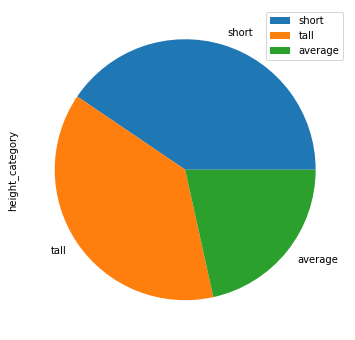

In [36]:
# plot pie of df_pie with size (width=10, height=6)
df_pie.plot(kind='pie', figsize=(10, 6), subplots=True)

### What did we learn?

* Data Preprocessing
* Real life scenario Example
* Classroom Management problem
    - sports
    - academics
    - creative work
    - marketing
* Getting hands dirty by writing code
* Plotting the pie chart for showing categorization